In [1]:
# pip install wordcloud
# !pip install gensim
# pip install pprint
# !pip install pyLDAvis
# pip install pickle 
# !pip install pyLDAvis
# !pip install os
import time

# Record the start time
start_time = time.time()


In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist, bigrams, word_tokenize
from nltk.stem import SnowballStemmer
import spacy

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# # Load the spaCy model and get the default stop words
nlp = spacy.load("en_core_web_sm")
spacy_stopwords = nlp.Defaults.stop_words

# # Custom stop words
# custom_stopwords = ["good"]

# # Filter out non-noun words
# custom_stopwords = [word for word in custom_stopwords if nlp(word)[0].pos_ == 'NOUN']

# # Add custom stop words
# spacy_stopwords |= set(custom_stopwords)

In [5]:
# Specify the columns you want to read
columns_to_read = ["text"]

# Read the CSV file with only the specified columns
df = pd.read_csv('filtered_reviews_part_4.csv', usecols=columns_to_read)

In [6]:
spacy_stopwords = nlp.Defaults.stop_words

# Define a function to process and clean text
def clean_text(text):
    # Parse the text with spaCy
    doc = nlp(text)
    
    # Apply filters to clean the text and extract only noun words
    cleaned_text = [token.text.lower() for token in doc if token.pos_ == 'NOUN' and token.text.isascii() and token.text.lower() not in spacy_stopwords]
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

In [7]:
df['text'] = df['text'].astype(str)

In [8]:
df['cleaned_text'] = df['text'].apply(clean_text)

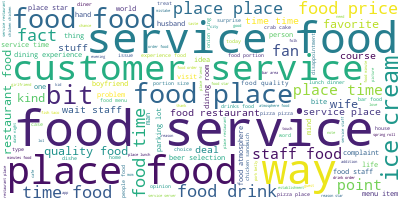

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['cleaned_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [10]:
import gensim
from gensim.utils import simple_preprocess


def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = df.cleaned_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
# print(data_words[:1][0])

In [11]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [12]:
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.034*"place" + 0.028*"food" + 0.014*"service" + 0.012*"time" + 0.012*"bar" '
  '+ 0.012*"chicken" + 0.011*"menu" + 0.009*"restaurant" + 0.009*"burger" + '
  '0.009*"staff"'),
 (1,
  '0.054*"food" + 0.027*"service" + 0.016*"restaurant" + 0.015*"place" + '
  '0.012*"sauce" + 0.011*"order" + 0.011*"time" + 0.010*"chicken" + '
  '0.007*"sandwich" + 0.007*"fries"'),
 (2,
  '0.038*"food" + 0.019*"place" + 0.017*"service" + 0.015*"time" + '
  '0.014*"menu" + 0.009*"lunch" + 0.009*"chicken" + 0.009*"table" + '
  '0.008*"order" + 0.008*"meal"'),
 (3,
  '0.036*"place" + 0.030*"food" + 0.024*"time" + 0.016*"pizza" + '
  '0.011*"restaurant" + 0.010*"experience" + 0.010*"service" + 0.008*"people" '
  '+ 0.007*"staff" + 0.007*"cheese"')]


In [13]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'results/ldavis_prepared_'+ str(num_topics) +'.html')
# LDAvis_prepared

In [14]:

# Your code goes here
# ...

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed Time: {elapsed_time} seconds")


Elapsed Time: 10550.708683490753 seconds
